# Format data from 2 photon experiments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%plt.style.use("v_paper")
import pandas as pd
import deepdish as dd
%matplotlib inline

In [2]:
from pathlib import Path

Import data

In [3]:
metadata_all = pd.read_excel(r"all_experiments_corrected_corrected0624.xlsx")

In [4]:
folder = Path(r"Planewiselobesegmentation")

In [5]:
metadata = []
flies = []
for i_row, flydata in metadata_all.iterrows():
    try:
        flies.append(dd.io.load(folder / (flydata.folder_name + ".h5")))
        metadata.append(flydata)
    except OSError:
        pass
    
metadata = pd.DataFrame(metadata)

In [6]:
flydata = pd.DataFrame([fly['metadata'] for fly in flies])

Reformat

In [7]:
def calc_f0(trace):
    return np.mean(trace[20:29])

In [8]:
flydata

,Corrupted,Unnamed: 0,comment,day,dx,dy,dz,fly_day_id,folder_name,fps,has_transform,hours_starved,presentation_index,stack_reversed,stimulus,stimulus_onset,virgin
0,NaN,0.0,NaN,2016-08-09,1.000,1.000,1,0,TH-58E02_090816_Citronella,3,1.0,0,1,True,citr,30,False
1,NaN,1.0,NaN,2016-08-09,1.000,1.000,1,0,TH-58E02_090816_Vinegar,3,1.0,0,0,False,Vinegar,30,False
2,NaN,2.0,NaN,2016-08-10,0.994,0.994,1,0,TH-58E02_100816_Citronella,3,1.0,0,0,False,Citornella,30,False
3,NaN,3.0,NaN,2016-08-10,1.000,1.000,1,0,TH-58E02_100816_Yeast,3,1.0,0,1,True,yeast,30,False
4,NaN,4.0,NaN,2016-08-11,1.000,1.000,1,0,TH-58E02_110816_Vin,3,1.0,0,1,True,vin,30,False
5,NaN,5.0,NaN,2016-08-11,1.000,1.000,1,0,TH-58E02_110816_Yeast,3,1.0,0,0,False,yeast,30,False
6,NaN,6.0,NaN,2016-08-16,1.000,1.000,1,0,TH-58E02_160816_Vinegar,3,1.0,0,0,False,vin,30,False
7,NaN,7.0,NaN,2016-08-16,1.000,1.000,1,0,TH-58E02_160816_Yeast,3,1.0,0,1,True,yeast,30,False
8,NaN,8.0,NaN,2016-08-17,1.000,1.000,1,0,TH-58E02_170816_Citronella,3,1.0,0,0,False,citr,30,False
9,NaN,9.0,NaN,2016-08-17,1.000,1.000,1,0,TH-58E02_170816_Vinegar,3,1.0,0,1,True,vin,30,False


In [9]:
len(flydata)

324

In [10]:
for stim_short, stim_long in [("vin", "Vinegar"),
                              ("Vinegar 1", "Vinegar"),
                             ("Vinegar 2", "Vinegar"),
                              ("Vinegar 3", "Vinegar"),
                              ("Vinegar 4", "Vinegar"),
                             ("citr", "Citronella"),
                              ("Citornella", "Citronella"),
                              ("Citronella 1", "Citronella"),
                              ("Citronella 2", "Citronella"),
                              ("Citronella 3", "Citronella"),
                              ("Citronella 4", "Citronella"),
                              ("Yeast 1", "Yeast"),
                              ("Yeast 4", "Yeast"),
                              ("Yeast 3", "Yeast"),
                               ("Yeast 2", "Yeast"),
                             ("yeast", "Yeast")]:
    flydata.loc[flydata.stimulus==stim_short, "stimulus"] = stim_long

In [11]:
valence_map = {
"Vinegar": 1,
"Yeast": 1,
"Isoamylacetate": np.nan,
"2-Heptanone": np.nan,
"1-Heptanone": np.nan,
    
"cVA": np.nan,
        "3Octanol": np.nan,
        "Ethanol": np.nan,

"1-Hexanol": np.nan,
"Peppermint": -1,
"4MCH": np.nan,
"Citronella": -1,
"Geosmin": -1,
}

flydata["valence"] = [valence_map[s] for s in flydata.stimulus]

In [12]:
del flydata["dx"]
del flydata["dy"]
del flydata["dz"]

In [13]:
del flydata["fps"]
del flydata["stimulus_onset"]

In [14]:
fd = flydata["folder_name"]
flydata["experiment_id"]=flydata["folder_name"]

In [15]:
ts = flydata.day[0]

In [16]:
import seaborn as sns
from datetime import datetime
from skimage.io import imsave

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

Calculate a bunch of variables

In [19]:
lobe_summary = dict(experiment_id=[],
                    stimulus=[],
                    valence=[],
                    dorsal_to_ventral=[],
                    hours_starved=[],
                    order_presented=[],
                    virgin=[],
                    lobe=[],
                    adaptation=[],
                    pre_std=[],
                    single_pre_std=[],
                    response_std=[],
                    fly_id=[]
                   )
df_fs = []


In [20]:
st=0
fe=0
for flyday in flydata["experiment_id"].unique():
    sel_flies = np.where(flydata["experiment_id"] == flyday)[0]
    starvetime = flydata["hours_starved"][sel_flies[0]]
    act_stim = []
    dorsal_to_ventral=flydata["stack_reversed"][sel_flies[0]]
    
    for i_plot, i_fly in enumerate(sel_flies):
        stimulus = flydata["stimulus"][i_fly]
        fly=flies[i_fly]
        if starvetime==0:
            fe=fe+1
        else:
            st=st+1

In [21]:
flydata

,Corrupted,Unnamed: 0,comment,day,fly_day_id,folder_name,has_transform,hours_starved,presentation_index,stack_reversed,stimulus,virgin,valence,experiment_id
0,NaN,0.0,NaN,2016-08-09,0,TH-58E02_090816_Citronella,1.0,0,1,True,Citronella,False,-1.0,TH-58E02_090816_Citronella
1,NaN,1.0,NaN,2016-08-09,0,TH-58E02_090816_Vinegar,1.0,0,0,False,Vinegar,False,1.0,TH-58E02_090816_Vinegar
2,NaN,2.0,NaN,2016-08-10,0,TH-58E02_100816_Citronella,1.0,0,0,False,Citronella,False,-1.0,TH-58E02_100816_Citronella
3,NaN,3.0,NaN,2016-08-10,0,TH-58E02_100816_Yeast,1.0,0,1,True,Yeast,False,1.0,TH-58E02_100816_Yeast
4,NaN,4.0,NaN,2016-08-11,0,TH-58E02_110816_Vin,1.0,0,1,True,Vinegar,False,1.0,TH-58E02_110816_Vin
5,NaN,5.0,NaN,2016-08-11,0,TH-58E02_110816_Yeast,1.0,0,0,False,Yeast,False,1.0,TH-58E02_110816_Yeast
6,NaN,6.0,NaN,2016-08-16,0,TH-58E02_160816_Vinegar,1.0,0,0,False,Vinegar,False,1.0,TH-58E02_160816_Vinegar
7,NaN,7.0,NaN,2016-08-16,0,TH-58E02_160816_Yeast,1.0,0,1,True,Yeast,False,1.0,TH-58E02_160816_Yeast
8,NaN,8.0,NaN,2016-08-17,0,TH-58E02_170816_Citronella,1.0,0,0,False,Citronella,False,-1.0,TH-58E02_170816_Citronella
9,NaN,9.0,NaN,2016-08-17,0,TH-58E02_170816_Vinegar,1.0,0,1,True,Vinegar,False,1.0,TH-58E02_170816_Vinegar


In [22]:
st=0
fe=0
for flyday in flydata["experiment_id"].unique():
    sel_flies = np.where(flydata["experiment_id"] == flyday)[0]
    starvetime = flydata["hours_starved"][sel_flies[0]]
    act_stim = []
    dorsal_to_ventral=flydata["stack_reversed"][sel_flies[0]]
    
    for i_plot, i_fly in enumerate(sel_flies):
        stimulus = flydata["stimulus"][i_fly]
        fly=flies[i_fly]
        flydayid=flydata["fly_day_id"][i_fly]
        day=flydata["day"][i_fly]
        if starvetime==0:
            fe=fe+1
        else:
            st=st+1
        for i_lobe, (name, (i_st, i_en)) in enumerate(fly["lobe_traces_starts_ends"].items()):
            
            trace = np.nanmean(np.array(fly["traces_mn"])[np.array(range(i_st+2,i_en-2))],0)            
            f0 = calc_f0(trace)
            normtrace=(trace-f0)/f0

            # CALCULATE ADAPTATION
            fluo_trials=np.nanmean(np.array(fly["traces_mn"])[np.array(range(i_st,i_en)),32:35],1)/np.nanmean(np.array(fly["traces_mn"])[np.array(range(i_st,i_en)),1:30],1)
            #fluo_trials=np.reshape(fluo_trials,(-1,1))
            single_pre_std=np.std(np.array(fly["traces_mn"])[np.array(range(i_st,i_en)),0:30],1)/np.nanmean(np.array(fly["traces_mn"])[np.array(range(i_st,i_en)),1:30],1)
            fluo_trials=fluo_trials[~np.isnan(fluo_trials)]
            single_pre_std=single_pre_std[~np.isnan(single_pre_std)]
            single_response_std=np.std(fluo_trials)
            X=np.zeros((fluo_trials.shape[0],2))
            X[:,1]=np.array(range(fluo_trials.shape[0]))
            reg = LinearRegression().fit(X,fluo_trials)
            #print(reg.coef_[1])
            lobe_summary["single_pre_std"].append(np.nanmean(single_pre_std))
            lobe_summary["pre_std"].append(np.std(normtrace[0:30]))
            lobe_summary["response_std"].append(single_response_std)
            if fly["metadata"]["stack_reversed"]:
                lobe_summary["adaptation"].append(reg.coef_[1])      
            else:
                lobe_summary["adaptation"].append(reg.coef_[1])  
            lobe_summary["experiment_id"].append(flyday)
            lobe_summary["stimulus"].append(stimulus)
            lobe_summary["dorsal_to_ventral"].append(dorsal_to_ventral)
            lobe_summary["hours_starved"].append(starvetime)
            lobe_summary["order_presented"].append(i_plot)
            lobe_summary["virgin"].append(flydata["virgin"][sel_flies[0]])
            lobe_summary["lobe"].append(name)
            lobe_summary["valence"].append(flydata["valence"].iloc[sel_flies[0]])
            lobe_summary["fly_id"].append(str(day)+str(flydayid))
            df_fs.append(normtrace)

In [23]:
x=np.array(lobe_summary["response_std"]).reshape((-1,1))
y=np.array(lobe_summary["pre_std"])
reg = LinearRegression().fit(x,y)
reg.score(x,y)

0.06510437527448121

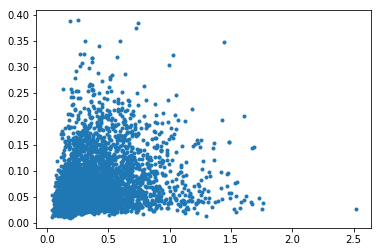

In [24]:
plt.plot(lobe_summary["response_std"],lobe_summary["pre_std"],'.')

In [25]:
x=np.array(lobe_summary["response_std"]).reshape((-1,1))
y=np.array(lobe_summary["single_pre_std"])
reg = LinearRegression().fit(x,y)
reg.score(x,y)

0.09875298375643506

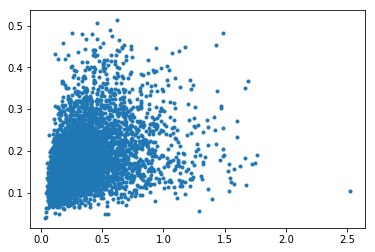

In [26]:
plt.plot(lobe_summary["response_std"],lobe_summary["single_pre_std"],'.')

In [27]:
df_fs = np.stack(df_fs, 0)
lobe_summary = pd.DataFrame(lobe_summary)
lobe_summary["df_mean"] = np.mean(df_fs[:, 31:35],1)

Save data summary

In [28]:
dd.io.save("experiments_summary.h5", dict(lobe_summary=lobe_summary, df_fs=df_fs), compression="blosc")

In [29]:
dd.io.save(r"Regression\experiments_summary.h5", dict(lobe_summary=lobe_summary, df_fs=df_fs), compression="blosc")

In [30]:
dd.io.save(r"Classification\experiments_summary.h5", dict(lobe_summary=lobe_summary, df_fs=df_fs), compression="blosc")

In [ ]:
# For Siju

In [ ]:
lobe_summary.to_csv("lobe_summary.txt")

In [ ]:
pd.DataFrame(df_fs).to_csv("df_fs.txt")

In [ ]:
for lobeid in lobe_data.experiment_id.unique():
    ST=lobe_data[lobe_data.xperiment_id==lobeid].hours_starved.values[0]
    stim=lobe_data[lobe_data.experiment_id==lobeid].stimulus.values[0]
    vg=lobe_data[lobe_data.experiment_id==lobeid].virgin.values[0]
    Data=pd.DataFrame(lobe_activities[lobe_data[lobe_data.experiment_id==lobeid].index[0:15]].T)
    file_name=lobeid[0:6]+"_bla_ST"+ST.astype(str)+"_"+stim+"_"+vg.astype(str)+".csv"
    Data.to_csv(file_name, header=lobe_data.lobe.unique())
    #do name
    #do add first line